## 빅데이터 실습

### COVID19, 코로나의 영향으로 중국인 관광객이 얼마나 줄었을까?

#### 데이터 수집
- 한국관광공사, [한국관광 데이터렙](https://datalab.visitkorea.or.kr/datalab/portal/main/getMainForm.do) 데이터
#### 데이터 로드 및 전처리
- 분석전 가장 중요한 단계, 데이터 분석의 8할은 데이터 전처리이다.
- Data Preprocessing : 분석에 적합하도록 원하는 형태로 데이터를 가공하는 과정
    - 결측치 처리(None,Null,Nan), 이상치 처리,변수 정규화, 파생 변수 생성

#### 분석
- 필요 요소를 분석
- 시각화, 결론 도출

In [1]:
import pandas as pd

In [2]:
## 1. 액셀 파일 경로 저장, 불러오기
kto_201901= pd.read_excel('./data/kto_201901.xlsx',header=1,usecols='A:G',skipfooter=4)

kto_201901

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,765082,10837,1423,14087,125521,916950
1,일본,198805,2233,127,785,4576,206526
2,대만,86393,74,22,180,1285,87954
3,홍콩,34653,59,2,90,1092,35896
4,마카오,2506,2,0,17,45,2570
...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690
63,기타대륙,33,4,0,1,16,54
64,국적미상,33,4,0,1,16,54
65,교포소계,0,0,0,0,15526,15526


#### 데이터 탐색

In [3]:
# DataFrame 각 정보개요
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


In [4]:
# DataFrame의 각 통계치
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.00000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,26396.80597,408.208955,132.507463,477.462687,5564.208955,32979.194030
std,102954.04969,1416.040302,474.406339,2009.484800,17209.438418,122821.369969
min,0.00000,0.000000,0.000000,0.000000,16.000000,54.000000
25%,505.00000,14.500000,2.500000,17.500000,260.000000,927.000000
50%,1304.00000,45.000000,14.000000,43.000000,912.000000,2695.000000
75%,8365.00000,176.500000,38.000000,182.000000,2824.500000,14905.500000
max,765082.00000,10837.000000,2657.000000,14087.000000,125521.000000,916950.000000


In [5]:
# 한 번도 한국에 방문한 적이 없는 대륙이나, 나라(목적별)
# 문자열 여러줄, 논리연산 여러줄 작성 시는 \를 붙여준다
condition = (kto_201901['관광'] == 0 )|(kto_201901['상용'] == 0) | \
    (kto_201901['공용'] == 0) | (kto_201901['유학/연수'] == 0)

kto_201901[condition]


,국적,관광,상용,공용,유학/연수,기타,계
4,마카오,2506,2,0,17,45,2570
20,이스라엘,727,12,0,9,57,805
22,우즈베키스탄,1958,561,0,407,2828,5754
38,스위스,613,18,0,19,97,747
45,그리스,481,17,4,0,273,775
46,포르투갈,416,14,0,13,121,564
51,크로아티아,226,12,0,3,250,491
54,폴란드,713,10,0,27,574,1324
59,대양주 기타,555,3,4,0,52,614
63,기타대륙,33,4,0,1,16,54


In [ ]:
##cmap pandas 데이터프레임 색
'''
Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 
'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens',
'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1',
'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples',
'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r',
'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r',
'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool',
'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r',
'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r',
'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r',
'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b',
'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r',
'winter', 'winter_r'

'''
kto_201901.style.background_gradient(axis=None,vmin=0,vmax=200_000,cmap='YlGnBu')

In [7]:
## 2. 기준년월 컬럼 추가

kto_201901['기준년월'] = '2019-01'
kto_201901

,국적,관광,상용,공용,유학/연수,기타,계,기준년월
0,아시아주,765082,10837,1423,14087,125521,916950,2019-01
1,일본,198805,2233,127,785,4576,206526,2019-01
2,대만,86393,74,22,180,1285,87954,2019-01
3,홍콩,34653,59,2,90,1092,35896,2019-01
4,마카오,2506,2,0,17,45,2570,2019-01
...,...,...,...,...,...,...,...,...
62,아프리카 기타,768,718,90,206,908,2690,2019-01
63,기타대륙,33,4,0,1,16,54,2019-01
64,국적미상,33,4,0,1,16,54,2019-01
65,교포소계,0,0,0,0,15526,15526,2019-01


In [8]:
##3. 국적데이터만 추출
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

In [9]:
## 8개 밖에 안 되는 데이터를 뽑아내기 위해 코딩하는 것은 효율적이지 못 하다
for item in kto_201901['국적']:
    if item.strip()[-1] == '주':
        print(item)

아시아주
미주
구주
대양주
아프리카주


In [10]:
## 대륙 리스트, 총 7개
continent_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']

In [11]:
##4. 대륙외 국적들만 뽑아내기
condition = kto_201901['국적'].isin(continent_list) == False
kto_201901_countires = kto_201901[condition]
kto_201901_countires['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

In [12]:
# 중간에 비는 인덱스없이 다시 시정 , inplace=True 기존 데이터를 대체해줌
kto_201901_countires.reset_index(drop=True,inplace=True)

In [ ]:
kto_201901_countires

In [14]:
for i in continent_list:
    print(i)

아시아주
미주
구주
대양주
아프리카주
기타대륙
교포소계


In [15]:
continents= ['아시아']*25 + ['아메리카'] * 5 + ['유럽'] * 23+ ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타 대륙'] +['교포']

In [ ]:
#5. 국적간 데이터 DF 마지막에 대륙 칼럼 추가
kto_201901_countires['대륙'] = continents
kto_201901_countires

In [17]:
## 6. 국적별 관광객 비율 컬럼 추가
kto_201901_countires['관광객비율(%)'] = round(kto_201901_countires['관광'] / kto_201901_countires['계'] * 100,1)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4876\4243465745.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kto_201901_countires['관광객비율(%)'] = round(kto_201901_countires['관광'] / kto_201901_countires['계'] * 100,1)


In [18]:
##SettingWithCopyWarning 해제하는 법
pd.set_option('mode.chained_assignment',None)

In [19]:
## 관광객 비율이 높은 나라 Top5
kto_201901_countires.sort_values(by='관광객비율(%)',ascending=False).head()


,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2
3,마카오,2506,2,0,17,45,2570,2019-01,아시아,97.5
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3
55,대양주 기타,555,3,4,0,52,614,2019-01,오세아니아,90.4


In [20]:
kto_201901_countires.sort_values(by='관광객비율(%)',ascending=True).head(6)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
59,교포,0,0,0,0,15526,15526,2019-01,교포,0.0
14,방글라데시,149,126,27,97,848,1247,2019-01,아시아,11.9
12,스리랑카,157,54,5,28,1043,1287,2019-01,아시아,12.2
13,파키스탄,238,178,10,193,413,1032,2019-01,아시아,23.1
15,캄보디아,635,39,55,51,1915,2695,2019-01,아시아,23.6
9,미얀마,1304,10,31,67,3877,5289,2019-01,아시아,24.7


In [21]:
##관광객 비율 평균 pivot_table
kto_201901_countires.pivot_table(values='관광객비율(%)',index='대륙',aggfunc='mean')

,관광객비율(%)
대륙,
교포,0.000000
기타 대륙,61.100000
아메리카,68.200000
아시아,59.624000
아프리카,32.700000
오세아니아,84.833333
유럽,63.826087


In [22]:
condition = kto_201901_countires['국적'] == '중국'

kto_201901_countires[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5


In [ ]:
kto_201901_countires.sort_values(by='관광',ascending=False)

In [24]:
## 전체 외국인 관광객 수
totalSum = sum(kto_201901_countires['관광'])

In [25]:
##7. 전체비율(%) 계산
kto_201901_countires['전체비율(%)'] = round(kto_201901_countires['관광'] / totalSum * 100,1)


In [26]:
## 관광객수가 가장 많은 극적 Top10
kto_201901_countires.sort_values(by='전체비율(%)',ascending=False).head(10)

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,320113,2993,138,8793,60777,392814,2019-01,아시아,81.5,36.2
0,일본,198805,2233,127,785,4576,206526,2019-01,아시아,96.3,22.5
1,대만,86393,74,22,180,1285,87954,2019-01,아시아,98.2,9.8
25,미국,42989,418,2578,229,16523,62737,2019-01,아메리카,68.5,4.9
2,홍콩,34653,59,2,90,1092,35896,2019-01,아시아,96.5,3.9
4,태국,34004,37,199,96,6998,41334,2019-01,아시아,82.3,3.8
5,말레이시아,19043,95,7,99,2821,22065,2019-01,아시아,86.3,2.2
47,러시아,17260,181,37,191,7525,25194,2019-01,유럽,68.5,2.0
6,필리핀,14279,211,161,184,15638,30473,2019-01,아시아,46.9,1.6
7,인도네시아,14183,136,38,187,4298,18842,2019-01,아시아,75.3,1.6


In [27]:
##125개 데이터를 전부 확인불가
## 샘플링 조회

kto201902 = pd.read_excel('./data/kto_201002.xlsx',header=1,usecols='A:G',skipfooter=4)

kto201902.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


#### 종합
- 위에서 하나의 엑셀로 처리한 방식을 반복문을 통해서 하나의 전체 125개 데이터를 통합하는 작업
- 코딩이 필요

In [72]:
## 년월별 데이터 전처리함수
def createData(yyyy,mm):
    # 1. 엑셀 파일 지정
    filePath = f'./data/kto_{yyyy}{mm:02d}.xlsx'

    # 2. 엑셀 파일 불러오기
    df = pd.read_excel(filePath,header=1,skipfooter=4,usecols='A:G')

    # 3. 기준년월 컬럼 추가
    df['기준년월'] = f'{yyyy}-{mm:02d}'

    # 4. "국적"컬럼에서 대륙 제거하고 국가만 남기기
    ignore_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
    condition = df['국적'].isin(ignore_list) == False
    df_countries = df[condition].reset_index(drop=True)

    # 5. 대륙 컬럼 추가
    continents= ['아시아']*25 + ['아메리카'] * 5 + ['유럽'] * 23+ ['오세아니아'] * 3 + ['아프리카'] * 2 + ['기타 대륙'] +['교포']
    df_countries['대륙'] = continents

    # 6. 국가별 관광객비율(%) 컬럼 추가
    df_countries['관광객비율(%)'] = round(df_countries['관광'] / df_countries['계'] * 100,1)

    # 7. 전체 비율(%) 컬럼 추가
    totalSum = sum(df_countries['관광'])
    df_countries['전체비율(%)'] = round(df_countries['관광'] / totalSum * 100,1)

    # 8. 결과리턴
    return(df_countries)
    

In [ ]:
createData(2019,9)

In [ ]:
##### tqdm 라이브러리 (진행률 표시)

In [90]:
from tqdm import tqdm
import time

In [87]:
text = ''
strList = ['H','e','l','l','o']
for char in tqdm(strList):
    text = text+char
    time.sleep(0.5)


100%|██████████| 5/5 [00:02<00:00,  1.98it/s]


In [105]:
## 빈 DF
df_total = pd.DataFrame()

In [114]:
for yyyy in tqdm(range(2010,2021)):
    for mm in range(1,13):
        try:
            temp = createData(yyyy,mm)
            df_total = pd.concat([df_total,temp],ignore_index=True)
        except:
            pass

100%|██████████| 11/11 [00:03<00:00,  3.14it/s]


In [115]:
## 결과 보기
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7500 non-null   object 
 1   관광        7500 non-null   int64  
 2   상용        7500 non-null   int64  
 3   공용        7500 non-null   int64  
 4   유학/연수     7500 non-null   int64  
 5   기타        7500 non-null   int64  
 6   계         7500 non-null   int64  
 7   기준년월      7500 non-null   object 
 8   대륙        7500 non-null   object 
 9   관광객비율(%)  7500 non-null   float64
 10  전체비율(%)   7500 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 644.7+ KB


In [116]:
## 파일 저장
df_total.to_excel('./data/kto_total.xlsx',index=False)

#### 데이터 시각화/분석



In [118]:
## 중국국적 데이터만 추출

condition = df_total['국적'] == '중국'


In [119]:
df_china = df_total[condition]

In [122]:
df_china.reset_index(drop=True,inplace=True)

In [123]:
df_china

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
1,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
2,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
3,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
4,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0
...,...,...,...,...,...,...,...,...,...,...,...
120,중국,393336,2813,99,10433,75000,481681,2020-01,아시아,81.7,38.2
121,중국,49520,715,11,20753,33087,104086,2020-02,아시아,47.6,9.8
122,중국,5040,115,2,7388,4050,16595,2020-03,아시아,30.4,16.0
123,중국,522,71,0,1112,2230,3935,2020-04,아시아,13.3,10.2


#### Matplotlib 시각화
- 필요 라이브러리 가져오기
- 한글 깨짐 현상 방지

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams,font_manager,rc
import matplotlib
font_path = 'C:/Windows/Fonts/NanumGothicCoding.ttf' #나눔고딕코딩체
font_name = font_manager.FontProperties(fname=font_path).get_name() # 실제 설치된 폰트 이름 조회
rc('font',family=font_name) # 한글깨짐 현상 해결!!
rcParams['axes.unicode_minus'] = False # 한글 사용시 마이너스가 표시가 깨지는 걸 방지

In [125]:
# 차트 스타일 지정
sns.set_style('darkgrid')


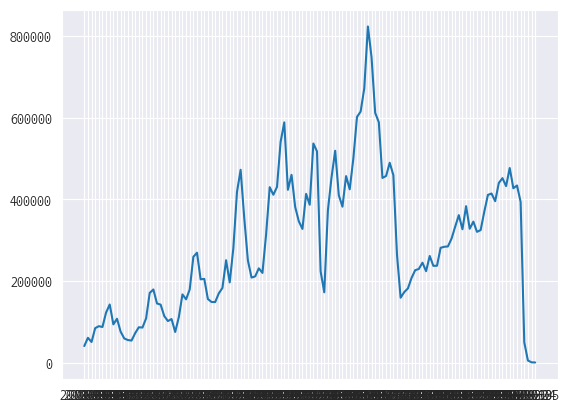

In [131]:
plt.plot(df_china['기준년월'],df_china['관광'])
plt.show()

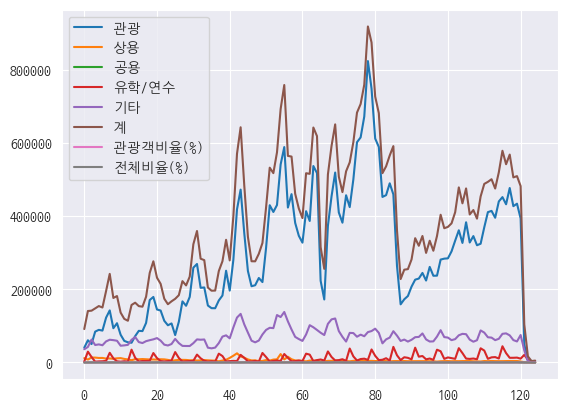

In [130]:
df_china.plot()
plt.show()


In [155]:
import warnings
warnings.filterwarnings('ignore')

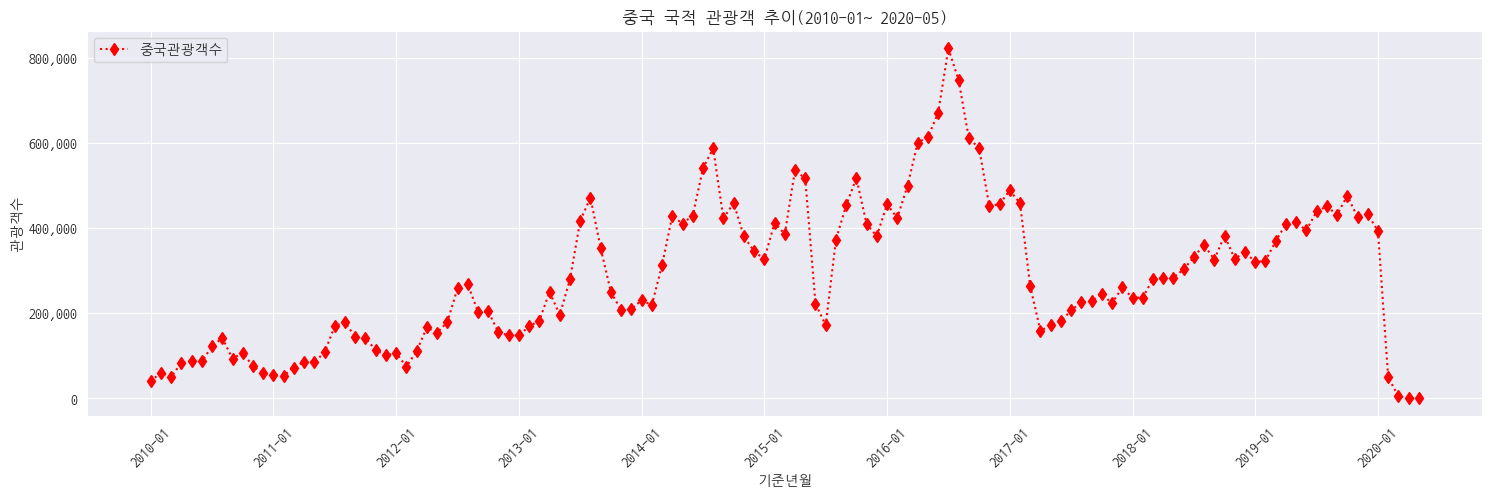

In [160]:
## 이쁘게 위의 데이터 출력 차트 변경
## 차트 크기 조절
plt.figure(figsize=(18,5))
##차트 그릴 내용
plt.plot(df_china['기준년월'],df_china['관광'],label='중국관광객수',color='r',linestyle=':',marker='d')
plt.title('중국 국적 관광객 추이(2010-01~ 2020-05)')
plt.legend(loc='upper left')
plt.xlabel('기준년월')
plt.ylabel('관광객수',rotation=90)
##x 축 라벨 늘리기
plt.xticks([f'{i}-01' for i in range(2010,2021)],rotation=45)
current_values = plt.gca().get_yticks() ## 1000단위 쉼표
plt.gca().set_yticklabels([f'{x:,.0f}'for x in current_values]) # 1000단위 쉼표
plt.show()